# Upper 100m sDIC

Script to create sDIC integrated over the upper 100m. Already summed the top 100m for SALT and DIC for all simulations. Just need to mess around with the final steps here (+ differencing)

In [50]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
DIC_filepath = '/glade/scratch/rbrady/EBUS_BGC_Variability/DIC_int100m_monthly/'
SALT_filepath = '/glade/scratch/rbrady/EBUS_BGC_Variability/SALT_int100m_monthly/'

In [56]:
da1 = xr.open_dataarray(DIC_filepath + 'DIC_int100m.001.192001-210012.nc', decode_times=False)
da2 = xr.open_dataarray(SALT_filepath + 'SALT_int100m.001.192001-210012.nc')

In [32]:
ds = (da1/da2) * 35

In [33]:
ds.name = 'sDIC_int100m'

In [34]:
del da1
del da2

In [47]:
ds = ds.stack(points=['nlat','nlon']).groupby('points').apply(np.gradient).unstack('points')

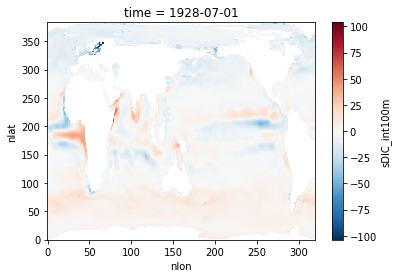

In [51]:
ds.isel(time=100).plot()

In [61]:
ds.attrs['test']= 'test'

In [64]:
ds.to_dataset()['sDIC_int100m']

<xarray.DataArray 'sDIC_int100m' (time: 2171, nlat: 384, nlon: 320)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1920-03-01 1920-04-01 1920-05-01 ...
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    ULAT     (nlat, nlon) float64 -78.